## Installing dependencies

In [1]:
%pip install -U "git+https://github.com/sashakolpakov/stonks-analysis.git@main"

  Cloning https://github.com/sashakolpakov/stonks-analysis.git (to revision main) to /tmp/pip-req-build-fij16rk5
  Running command git clone --filter=blob:none --quiet https://github.com/sashakolpakov/stonks-analysis.git /tmp/pip-req-build-fij16rk5
  Resolved https://github.com/sashakolpakov/stonks-analysis.git to commit 5709c46843e4e6bccf1339760d06f2a89cbe84ae
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 44.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to buil

In [7]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import hdbscan

from sklearn.preprocessing   import StandardScaler
from sklearn.decomposition   import PCA
from sklearn.manifold        import TSNE
from dire_jax                import DiRe
from mpl_toolkits.mplot3d    import Axes3D  # registers the 3D projection
from stonks_analysis         import download_data, compute_generic_features

## Embedding and clustering stocks / indices / crypto

In [3]:
tickers = ["AAPL", "AMZN", "PLTR", "^DJI", "^IXIC", "BTC-USD", "ETH-USD", "DOGE-USD"]
lookback = 90 # days

In [4]:
# ── 1) Download data and align time series ───────────────────────────────────
raw     = {t: download_data(t, lookback_days=lookback) for t in tickers}
common_idx = raw[tickers[0]].index
for t in tickers[1:]:
    common_idx = common_idx.intersection(raw[t].index)
aligned = {t: raw[t].loc[common_idx] for t in tickers}

dfs = []
for t in tickers:
    feats = compute_generic_features(aligned[t]).dropna()
    feats["Ticker"] = t.replace("-USD","")
    dfs.append(feats)
df_pts = pd.concat(dfs)

labels     = df_pts["Ticker"].tolist()
label_list = sorted(set(labels))
palette    = plt.get_cmap("tab10")

X        = df_pts[["Close","LogVol","Return"]].values
X_scaled = StandardScaler().fit_transform(X)

# ── 2) Build reducers ────────────────────────────────────────────────────────
def make_reducers(dim):
    return {
        "DiRe-JAX": DiRe(dimension=dim, n_neighbors=32,
                         init_embedding_type="spectral",
                         max_iter_layout=64, cutoff=8),
        "PCA":      PCA(n_components=dim),
        "t-SNE":    TSNE(n_components=dim, init="pca"),
        "UMAP":     umap.UMAP(n_components=dim)
    }

# ── 3) Compute embeddings for 2D & 3D ────────────────────────────────────────────
dims = [2, 3]
embeddings = {
    ("raw",   d, name): red.fit_transform(X)
    for d in dims
    for name, red in make_reducers(d).items()
}
embeddings.update({
    ("scaled", d, name): red.fit_transform(X_scaled)
    for d in dims
    for name, red in make_reducers(d).items()
})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


2025-08-25 20:34:04.565 | INFO     | dire_jax.dire:fit:276 - fit ...
2025-08-25 20:34:04.565 | INFO     | dire_jax.dire:fit:283 - Dimension 3, number of samples 496
2025-08-25 20:34:04.566 | INFO     | dire_jax.dire:make_knn_adjacency:402 - make_knn_adjacency ...
2025-08-25 20:34:20.822 | INFO     | dire_jax.dire:make_knn_adjacency:418 - Using batch size: 496
2025-08-25 20:34:26.284 | INFO     | dire_jax.dire:make_knn_adjacency:453 - make_knn_adjacency done ...
2025-08-25 20:34:26.285 | INFO     | dire_jax.dire:find_ab_params:240 - find_ab_params ...
2025-08-25 20:34:26.287 | INFO     | dire_jax.dire:find_ab_params:252 - a = 1.8956058664339035, b = 0.8006378442860499
2025-08-25 20:34:26.287 | INFO     | dire_jax.dire:find_ab_params:253 - find_ab_params done ...
2025-08-25 20:34:26.288 | INFO     | dire_jax.dire:fit:289 - fit done ...
2025-08-25 20:34:26.288 | INFO     | dire_jax.dire:transform:322 - transform ...
2025-08-25 20:34:26.289 | INFO     | dire_jax.dire:do_spectral_embedding:

  0%|          | 0/64 [00:00<?, ?it/s]

2025-08-25 20:34:26.719 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:35.871 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:35.873 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  2%|▏         | 1/64 [00:15<16:02, 15.27s/it]

2025-08-25 20:34:41.990 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:42.011 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:42.012 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  3%|▎         | 2/64 [00:15<06:41,  6.48s/it]

2025-08-25 20:34:42.311 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:42.331 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:42.332 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  5%|▍         | 3/64 [00:15<03:43,  3.66s/it]

2025-08-25 20:34:42.623 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:42.643 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:42.644 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  6%|▋         | 4/64 [00:16<02:20,  2.34s/it]

2025-08-25 20:34:42.939 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:42.960 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:42.961 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  8%|▊         | 5/64 [00:16<01:34,  1.61s/it]

2025-08-25 20:34:43.250 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:43.272 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:43.273 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  9%|▉         | 6/64 [00:16<01:07,  1.17s/it]

2025-08-25 20:34:43.567 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:43.587 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:43.588 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 11%|█         | 7/64 [00:17<00:50,  1.12it/s]

2025-08-25 20:34:43.878 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:43.900 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:43.901 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 12%|█▎        | 8/64 [00:17<00:39,  1.42it/s]

2025-08-25 20:34:44.190 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:44.210 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:44.211 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 14%|█▍        | 9/64 [00:17<00:32,  1.72it/s]

2025-08-25 20:34:44.501 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:44.522 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:44.523 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 16%|█▌        | 10/64 [00:18<00:26,  2.00it/s]

2025-08-25 20:34:44.816 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:44.836 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:44.837 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 17%|█▋        | 11/64 [00:18<00:23,  2.26it/s]

2025-08-25 20:34:45.130 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:45.151 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:45.152 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 19%|█▉        | 12/64 [00:18<00:21,  2.47it/s]

2025-08-25 20:34:45.447 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:45.467 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:45.468 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 20%|██        | 13/64 [00:19<00:19,  2.65it/s]

2025-08-25 20:34:45.760 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:45.781 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:45.782 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 22%|██▏       | 14/64 [00:19<00:17,  2.80it/s]

2025-08-25 20:34:46.073 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:46.094 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:46.095 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 23%|██▎       | 15/64 [00:19<00:16,  2.88it/s]

2025-08-25 20:34:46.395 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:46.415 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:46.416 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 25%|██▌       | 16/64 [00:20<00:16,  2.93it/s]

2025-08-25 20:34:46.723 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:46.768 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:46.769 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 27%|██▋       | 17/64 [00:20<00:16,  2.88it/s]

2025-08-25 20:34:47.084 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:47.105 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:47.105 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 28%|██▊       | 18/64 [00:20<00:15,  2.97it/s]

2025-08-25 20:34:47.395 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:47.416 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:47.417 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 30%|██▉       | 19/64 [00:20<00:14,  3.01it/s]

2025-08-25 20:34:47.717 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:47.738 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:47.739 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 31%|███▏      | 20/64 [00:21<00:14,  3.05it/s]

2025-08-25 20:34:48.037 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:48.057 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:48.058 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 33%|███▎      | 21/64 [00:21<00:14,  3.06it/s]

2025-08-25 20:34:48.360 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:48.380 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:48.381 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 34%|███▍      | 22/64 [00:21<00:13,  3.09it/s]

2025-08-25 20:34:48.675 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:48.696 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:48.696 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 36%|███▌      | 23/64 [00:22<00:13,  3.12it/s]

2025-08-25 20:34:48.991 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:49.011 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:49.012 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 38%|███▊      | 24/64 [00:22<00:12,  3.14it/s]

2025-08-25 20:34:49.302 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:49.322 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:49.323 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 39%|███▉      | 25/64 [00:22<00:12,  3.17it/s]

2025-08-25 20:34:49.612 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:49.632 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:49.633 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 41%|████      | 26/64 [00:23<00:11,  3.18it/s]

2025-08-25 20:34:49.925 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:49.946 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:49.946 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 42%|████▏     | 27/64 [00:23<00:11,  3.19it/s]

2025-08-25 20:34:50.234 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:50.254 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:50.255 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 44%|████▍     | 28/64 [00:23<00:11,  3.20it/s]

2025-08-25 20:34:50.545 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:50.565 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:50.566 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 45%|████▌     | 29/64 [00:24<00:10,  3.20it/s]

2025-08-25 20:34:50.857 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:50.878 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:50.879 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 47%|████▋     | 30/64 [00:24<00:10,  3.17it/s]

2025-08-25 20:34:51.178 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:51.201 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:51.202 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 48%|████▊     | 31/64 [00:24<00:10,  3.14it/s]

2025-08-25 20:34:51.505 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:51.525 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:51.526 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 50%|█████     | 32/64 [00:25<00:10,  3.14it/s]

2025-08-25 20:34:51.824 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:51.869 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:51.870 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 52%|█████▏    | 33/64 [00:25<00:10,  3.07it/s]

2025-08-25 20:34:52.166 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:52.186 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:52.187 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 53%|█████▎    | 34/64 [00:25<00:09,  3.11it/s]

2025-08-25 20:34:52.479 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:52.500 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:52.501 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 55%|█████▍    | 35/64 [00:26<00:09,  3.12it/s]

2025-08-25 20:34:52.796 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:52.816 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:52.817 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 56%|█████▋    | 36/64 [00:26<00:08,  3.11it/s]

2025-08-25 20:34:53.119 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:53.139 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:53.140 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 58%|█████▊    | 37/64 [00:26<00:08,  3.13it/s]

2025-08-25 20:34:53.434 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:53.454 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:53.455 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 59%|█████▉    | 38/64 [00:27<00:08,  3.12it/s]

2025-08-25 20:34:53.757 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:53.778 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:53.778 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 61%|██████    | 39/64 [00:27<00:07,  3.13it/s]

2025-08-25 20:34:54.074 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:54.094 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:54.095 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 62%|██████▎   | 40/64 [00:27<00:07,  3.13it/s]

2025-08-25 20:34:54.393 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:54.414 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:54.415 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 64%|██████▍   | 41/64 [00:27<00:07,  3.12it/s]

2025-08-25 20:34:54.716 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:54.737 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:54.738 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 66%|██████▌   | 42/64 [00:28<00:07,  3.13it/s]

2025-08-25 20:34:55.033 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:55.054 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:55.055 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 67%|██████▋   | 43/64 [00:28<00:06,  3.15it/s]

2025-08-25 20:34:55.345 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:55.366 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:55.367 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 69%|██████▉   | 44/64 [00:28<00:06,  3.15it/s]

2025-08-25 20:34:55.663 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:55.685 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:55.686 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 70%|███████   | 45/64 [00:29<00:06,  3.12it/s]

2025-08-25 20:34:55.991 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:56.012 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:56.012 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 72%|███████▏  | 46/64 [00:29<00:05,  3.10it/s]

2025-08-25 20:34:56.319 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:56.339 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:56.340 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 73%|███████▎  | 47/64 [00:29<00:05,  3.11it/s]

2025-08-25 20:34:56.638 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:56.658 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:56.659 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 75%|███████▌  | 48/64 [00:30<00:05,  3.12it/s]

2025-08-25 20:34:56.957 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:57.001 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:57.001 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 77%|███████▋  | 49/64 [00:30<00:04,  3.06it/s]

2025-08-25 20:34:57.299 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:57.319 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:57.320 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 78%|███████▊  | 50/64 [00:30<00:04,  3.09it/s]

2025-08-25 20:34:57.613 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:57.633 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:57.634 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 80%|███████▉  | 51/64 [00:31<00:04,  3.11it/s]

2025-08-25 20:34:57.931 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:57.952 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:57.953 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 81%|████████▏ | 52/64 [00:31<00:03,  3.12it/s]

2025-08-25 20:34:58.248 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:58.269 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:58.270 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 83%|████████▎ | 53/64 [00:31<00:03,  3.08it/s]

2025-08-25 20:34:58.582 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:58.603 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:58.604 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 84%|████████▍ | 54/64 [00:32<00:03,  3.05it/s]

2025-08-25 20:34:58.918 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:58.938 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:58.939 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 86%|████████▌ | 55/64 [00:32<00:02,  3.08it/s]

2025-08-25 20:34:59.236 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:59.256 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:59.257 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 88%|████████▊ | 56/64 [00:32<00:02,  3.07it/s]

2025-08-25 20:34:59.563 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:59.584 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:59.585 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 89%|████████▉ | 57/64 [00:33<00:02,  3.07it/s]

2025-08-25 20:34:59.890 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:34:59.911 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:34:59.912 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 91%|█████████ | 58/64 [00:33<00:01,  3.08it/s]

2025-08-25 20:35:00.210 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:00.231 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:00.232 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 92%|█████████▏| 59/64 [00:33<00:01,  3.11it/s]

2025-08-25 20:35:00.524 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:00.545 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:00.546 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 94%|█████████▍| 60/64 [00:34<00:01,  3.12it/s]

2025-08-25 20:35:00.843 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:00.863 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:00.864 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 95%|█████████▌| 61/64 [00:34<00:00,  3.12it/s]

2025-08-25 20:35:01.162 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:01.182 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:01.183 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 97%|█████████▋| 62/64 [00:34<00:00,  3.14it/s]

2025-08-25 20:35:01.478 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:01.498 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:01.499 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 98%|█████████▊| 63/64 [00:35<00:00,  3.14it/s]

2025-08-25 20:35:01.797 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:01.817 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:01.818 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


100%|██████████| 64/64 [00:35<00:00,  1.81it/s]

2025-08-25 20:35:02.257 | INFO     | dire_jax.dire:do_layout:804 - do_layout done ...
2025-08-25 20:35:02.258 | INFO     | dire_jax.dire:transform:339 - transform done ...



/usr/local/lib/python3.12/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


2025-08-25 20:35:12.586 | INFO     | dire_jax.dire:fit:276 - fit ...
2025-08-25 20:35:12.587 | INFO     | dire_jax.dire:fit:283 - Dimension 3, number of samples 496
2025-08-25 20:35:12.588 | INFO     | dire_jax.dire:make_knn_adjacency:402 - make_knn_adjacency ...
2025-08-25 20:35:12.588 | INFO     | dire_jax.dire:make_knn_adjacency:418 - Using batch size: 496
2025-08-25 20:35:12.834 | INFO     | dire_jax.dire:make_knn_adjacency:453 - make_knn_adjacency done ...
2025-08-25 20:35:12.834 | INFO     | dire_jax.dire:find_ab_params:240 - find_ab_params ...
2025-08-25 20:35:12.836 | INFO     | dire_jax.dire:find_ab_params:252 - a = 1.8956058664339035, b = 0.8006378442860499
2025-08-25 20:35:12.836 | INFO     | dire_jax.dire:find_ab_params:253 - find_ab_params done ...
2025-08-25 20:35:12.837 | INFO     | dire_jax.dire:fit:289 - fit done ...
2025-08-25 20:35:12.837 | INFO     | dire_jax.dire:transform:322 - transform ...
2025-08-25 20:35:12.838 | INFO     | dire_jax.dire:do_spectral_embedding:

  0%|          | 0/64 [00:00<?, ?it/s]

2025-08-25 20:35:13.202 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:16.235 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:16.237 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  2%|▏         | 1/64 [00:08<09:25,  8.98s/it]

2025-08-25 20:35:22.186 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:22.207 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:22.208 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  3%|▎         | 2/64 [00:09<04:02,  3.92s/it]

2025-08-25 20:35:22.559 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:22.580 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:22.581 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  5%|▍         | 3/64 [00:09<02:20,  2.30s/it]

2025-08-25 20:35:22.925 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:22.946 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:22.947 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  6%|▋         | 4/64 [00:10<01:32,  1.54s/it]

2025-08-25 20:35:23.298 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:23.320 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:23.320 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  8%|▊         | 5/64 [00:10<01:05,  1.12s/it]

2025-08-25 20:35:23.667 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:23.689 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:23.690 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  9%|▉         | 6/64 [00:10<00:49,  1.16it/s]

2025-08-25 20:35:24.033 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:24.053 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:24.054 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 11%|█         | 7/64 [00:11<00:39,  1.43it/s]

2025-08-25 20:35:24.405 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:24.426 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:24.427 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 12%|█▎        | 8/64 [00:11<00:33,  1.69it/s]

2025-08-25 20:35:24.764 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:24.785 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:24.786 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 14%|█▍        | 9/64 [00:11<00:28,  1.93it/s]

2025-08-25 20:35:25.123 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:25.143 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:25.144 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 16%|█▌        | 10/64 [00:12<00:25,  2.11it/s]

2025-08-25 20:35:25.495 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:25.516 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:25.516 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 17%|█▋        | 11/64 [00:12<00:23,  2.28it/s]

2025-08-25 20:35:25.857 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:25.877 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:25.878 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 19%|█▉        | 12/64 [00:13<00:21,  2.39it/s]

2025-08-25 20:35:26.226 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:26.247 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:26.248 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 20%|██        | 13/64 [00:13<00:20,  2.47it/s]

2025-08-25 20:35:26.602 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:26.623 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:26.624 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 22%|██▏       | 14/64 [00:13<00:19,  2.54it/s]

2025-08-25 20:35:26.969 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:27.010 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:27.011 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 23%|██▎       | 15/64 [00:14<00:19,  2.55it/s]

2025-08-25 20:35:27.359 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:27.380 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:27.381 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 25%|██▌       | 16/64 [00:14<00:18,  2.59it/s]

2025-08-25 20:35:27.730 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:27.750 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:27.751 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 27%|██▋       | 17/64 [00:14<00:17,  2.65it/s]

2025-08-25 20:35:28.087 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:28.107 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:28.108 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 28%|██▊       | 18/64 [00:15<00:17,  2.69it/s]

2025-08-25 20:35:28.447 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:28.468 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:28.469 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 30%|██▉       | 19/64 [00:15<00:16,  2.68it/s]

2025-08-25 20:35:28.824 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:28.845 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:28.846 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 31%|███▏      | 20/64 [00:15<00:16,  2.70it/s]

2025-08-25 20:35:29.186 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:29.207 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:29.208 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 33%|███▎      | 21/64 [00:16<00:15,  2.72it/s]

2025-08-25 20:35:29.548 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:29.569 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:29.570 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 34%|███▍      | 22/64 [00:16<00:15,  2.72it/s]

2025-08-25 20:35:29.917 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:29.938 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:29.939 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 36%|███▌      | 23/64 [00:17<00:15,  2.73it/s]

2025-08-25 20:35:30.279 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:30.300 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:30.300 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 38%|███▊      | 24/64 [00:17<00:14,  2.75it/s]

2025-08-25 20:35:30.637 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:30.659 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:30.659 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 39%|███▉      | 25/64 [00:17<00:14,  2.73it/s]

2025-08-25 20:35:31.008 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:31.029 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:31.030 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 41%|████      | 26/64 [00:18<00:13,  2.75it/s]

2025-08-25 20:35:31.366 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:31.388 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:31.389 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 42%|████▏     | 27/64 [00:18<00:13,  2.75it/s]

2025-08-25 20:35:31.729 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:31.750 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:31.751 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 44%|████▍     | 28/64 [00:18<00:13,  2.73it/s]

2025-08-25 20:35:32.101 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:32.142 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:32.143 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 45%|████▌     | 29/64 [00:19<00:12,  2.70it/s]

2025-08-25 20:35:32.482 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:32.502 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:32.503 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 47%|████▋     | 30/64 [00:19<00:12,  2.73it/s]

2025-08-25 20:35:32.837 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:32.858 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:32.859 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 48%|████▊     | 31/64 [00:19<00:12,  2.74it/s]

2025-08-25 20:35:33.201 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:33.221 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:33.222 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 50%|█████     | 32/64 [00:20<00:11,  2.76it/s]

2025-08-25 20:35:33.555 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:33.576 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:33.577 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 52%|█████▏    | 33/64 [00:20<00:11,  2.77it/s]

2025-08-25 20:35:33.914 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:33.934 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:33.935 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 53%|█████▎    | 34/64 [00:21<00:10,  2.73it/s]

2025-08-25 20:35:34.292 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:34.313 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:34.314 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 55%|█████▍    | 35/64 [00:21<00:10,  2.74it/s]

2025-08-25 20:35:34.656 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:34.676 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:34.677 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 56%|█████▋    | 36/64 [00:21<00:10,  2.75it/s]

2025-08-25 20:35:35.017 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:35.038 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:35.039 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 58%|█████▊    | 37/64 [00:22<00:09,  2.71it/s]

2025-08-25 20:35:35.396 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:35.417 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:35.418 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 59%|█████▉    | 38/64 [00:22<00:09,  2.65it/s]

2025-08-25 20:35:35.796 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:35.816 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:35.817 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 61%|██████    | 39/64 [00:22<00:09,  2.67it/s]

2025-08-25 20:35:36.161 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:36.183 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:36.184 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 62%|██████▎   | 40/64 [00:23<00:08,  2.67it/s]

2025-08-25 20:35:36.538 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:36.559 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:36.560 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 64%|██████▍   | 41/64 [00:23<00:08,  2.70it/s]

2025-08-25 20:35:36.897 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:36.918 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:36.919 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 66%|██████▌   | 42/64 [00:24<00:08,  2.73it/s]

2025-08-25 20:35:37.253 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:37.295 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:37.296 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 67%|██████▋   | 43/64 [00:24<00:07,  2.70it/s]

2025-08-25 20:35:37.633 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:37.654 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:37.655 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 69%|██████▉   | 44/64 [00:24<00:07,  2.73it/s]

2025-08-25 20:35:37.989 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:38.010 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:38.011 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 70%|███████   | 45/64 [00:25<00:06,  2.76it/s]

2025-08-25 20:35:38.343 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:38.364 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:38.365 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 72%|███████▏  | 46/64 [00:25<00:06,  2.78it/s]

2025-08-25 20:35:38.698 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:38.719 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:38.720 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 73%|███████▎  | 47/64 [00:25<00:06,  2.78it/s]

2025-08-25 20:35:39.056 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:39.077 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:39.077 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 75%|███████▌  | 48/64 [00:26<00:05,  2.77it/s]

2025-08-25 20:35:39.420 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:39.441 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:39.442 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 77%|███████▋  | 49/64 [00:26<00:05,  2.78it/s]

2025-08-25 20:35:39.778 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:39.799 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:39.800 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 78%|███████▊  | 50/64 [00:26<00:05,  2.79it/s]

2025-08-25 20:35:40.134 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:40.154 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:40.155 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 80%|███████▉  | 51/64 [00:27<00:04,  2.80it/s]

2025-08-25 20:35:40.487 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:40.508 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:40.509 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 81%|████████▏ | 52/64 [00:27<00:04,  2.79it/s]

2025-08-25 20:35:40.848 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:40.869 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:40.870 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 83%|████████▎ | 53/64 [00:28<00:03,  2.79it/s]

2025-08-25 20:35:41.205 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:41.226 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:41.227 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 84%|████████▍ | 54/64 [00:28<00:03,  2.80it/s]

2025-08-25 20:35:41.561 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:41.581 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:41.582 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 86%|████████▌ | 55/64 [00:28<00:03,  2.80it/s]

2025-08-25 20:35:41.918 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:41.939 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:41.940 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 88%|████████▊ | 56/64 [00:29<00:02,  2.79it/s]

2025-08-25 20:35:42.277 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:42.321 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:42.322 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 89%|████████▉ | 57/64 [00:29<00:02,  2.75it/s]

2025-08-25 20:35:42.656 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:42.677 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:42.678 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 91%|█████████ | 58/64 [00:29<00:02,  2.76it/s]

2025-08-25 20:35:43.014 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:43.036 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:43.037 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 92%|█████████▏| 59/64 [00:30<00:01,  2.77it/s]

2025-08-25 20:35:43.372 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:43.393 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:43.394 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 94%|█████████▍| 60/64 [00:30<00:01,  2.79it/s]

2025-08-25 20:35:43.725 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:43.745 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:43.746 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 95%|█████████▌| 61/64 [00:30<00:01,  2.80it/s]

2025-08-25 20:35:44.079 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:44.100 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:44.101 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 97%|█████████▋| 62/64 [00:31<00:00,  2.81it/s]

2025-08-25 20:35:44.432 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:44.452 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:44.453 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 98%|█████████▊| 63/64 [00:31<00:00,  2.81it/s]

2025-08-25 20:35:44.786 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:44.808 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:44.809 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


100%|██████████| 64/64 [00:31<00:00,  2.00it/s]

2025-08-25 20:35:45.317 | INFO     | dire_jax.dire:do_layout:804 - do_layout done ...
2025-08-25 20:35:45.317 | INFO     | dire_jax.dire:transform:339 - transform done ...


2025-08-25 20:35:47.869 | INFO     | dire_jax.dire:fit:276 - fit ...
2025-08-25 20:35:47.870 | INFO     | dire_jax.dire:fit:283 - Dimension 3, number of samples 496
2025-08-25 20:35:47.870 | INFO     | dire_jax.dire:make_knn_adjacency:402 - make_knn_adjacency ...
2025-08-25 20:35:47.871 | INFO     | dire_jax.dire:make_knn_adjacency:418 - Using batch size: 496
2025-08-25 20:35:48.080 | INFO     | dire_jax.dire:make_knn_adjacency:453 - make_knn_adjacency done ...
2025-08-25 20:35:48.081 | INFO     | dire_jax.dire:find_ab_params:240 - find_ab_params ...
2025-08-25 20:35:48.082 | INFO     | dire_jax.dire:find_ab_params:252 - a = 1.8956058664339035, b = 0.8006378442860499
2025-08-25 20:35:48.083 | INFO     | dire_jax.dire:find_ab_params:253 - find_ab_params done ...
2025-08-25 20:35:48.083 | INFO     | dire_jax.dire:fit:289 - fit done ...
2025-08-25 20:35:48.083 | INFO     | dire_jax.dire:transform:322 - transform ...
2025-08-25 20:35:48.084 | INFO     | dire_jax.dire:do_spectral_embedding:

  0%|          | 0/64 [00:00<?, ?it/s]

2025-08-25 20:35:48.116 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:48.140 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:48.141 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  2%|▏         | 1/64 [00:00<00:23,  2.63it/s]

2025-08-25 20:35:48.496 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:48.517 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:48.518 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  3%|▎         | 2/64 [00:00<00:22,  2.71it/s]

2025-08-25 20:35:48.857 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:48.879 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:48.880 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  5%|▍         | 3/64 [00:01<00:22,  2.73it/s]

2025-08-25 20:35:49.220 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:49.242 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:49.243 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  6%|▋         | 4/64 [00:01<00:21,  2.74it/s]

2025-08-25 20:35:49.584 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:49.606 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:49.607 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  8%|▊         | 5/64 [00:01<00:21,  2.75it/s]

2025-08-25 20:35:49.945 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:49.966 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:49.967 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  9%|▉         | 6/64 [00:02<00:20,  2.77it/s]

2025-08-25 20:35:50.302 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:50.323 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:50.323 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 11%|█         | 7/64 [00:02<00:20,  2.78it/s]

2025-08-25 20:35:50.659 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:50.680 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:50.681 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 12%|█▎        | 8/64 [00:02<00:20,  2.78it/s]

2025-08-25 20:35:51.018 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:51.039 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:51.040 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 14%|█▍        | 9/64 [00:03<00:19,  2.77it/s]

2025-08-25 20:35:51.381 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:51.402 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:51.403 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 16%|█▌        | 10/64 [00:03<00:19,  2.77it/s]

2025-08-25 20:35:51.741 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:51.763 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:51.764 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 17%|█▋        | 11/64 [00:03<00:19,  2.78it/s]

2025-08-25 20:35:52.098 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:52.119 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:52.120 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 19%|█▉        | 12/64 [00:04<00:18,  2.81it/s]

2025-08-25 20:35:52.448 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:52.468 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:52.469 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 20%|██        | 13/64 [00:04<00:18,  2.80it/s]

2025-08-25 20:35:52.807 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:52.828 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:52.829 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 22%|██▏       | 14/64 [00:05<00:17,  2.80it/s]

2025-08-25 20:35:53.166 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:53.207 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:53.208 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 23%|██▎       | 15/64 [00:05<00:17,  2.74it/s]

2025-08-25 20:35:53.546 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:53.567 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:53.568 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 25%|██▌       | 16/64 [00:05<00:17,  2.76it/s]

2025-08-25 20:35:53.905 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:53.926 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:53.926 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 27%|██▋       | 17/64 [00:06<00:17,  2.76it/s]

2025-08-25 20:35:54.264 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:54.285 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:54.286 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 28%|██▊       | 18/64 [00:06<00:16,  2.78it/s]

2025-08-25 20:35:54.620 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:54.641 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:54.642 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 30%|██▉       | 19/64 [00:06<00:16,  2.78it/s]

2025-08-25 20:35:54.980 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:55.001 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:55.002 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 31%|███▏      | 20/64 [00:07<00:15,  2.78it/s]

2025-08-25 20:35:55.337 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:55.358 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:55.358 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 33%|███▎      | 21/64 [00:07<00:15,  2.80it/s]

2025-08-25 20:35:55.690 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:55.710 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:55.711 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 34%|███▍      | 22/64 [00:07<00:15,  2.77it/s]

2025-08-25 20:35:56.060 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:56.081 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:56.082 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 36%|███▌      | 23/64 [00:08<00:14,  2.75it/s]

2025-08-25 20:35:56.428 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:56.449 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:56.450 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 38%|███▊      | 24/64 [00:08<00:14,  2.76it/s]

2025-08-25 20:35:56.786 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:56.807 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:56.808 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 39%|███▉      | 25/64 [00:09<00:14,  2.77it/s]

2025-08-25 20:35:57.144 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:57.165 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:57.166 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 41%|████      | 26/64 [00:09<00:13,  2.78it/s]

2025-08-25 20:35:57.502 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:57.524 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:57.524 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 42%|████▏     | 27/64 [00:09<00:13,  2.78it/s]

2025-08-25 20:35:57.861 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:57.883 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:57.884 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 44%|████▍     | 28/64 [00:10<00:12,  2.78it/s]

2025-08-25 20:35:58.219 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:58.262 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:58.263 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 45%|████▌     | 29/64 [00:10<00:13,  2.65it/s]

2025-08-25 20:35:58.637 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:58.659 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:58.660 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 47%|████▋     | 30/64 [00:10<00:12,  2.64it/s]

2025-08-25 20:35:59.020 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:59.042 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:59.043 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 48%|████▊     | 31/64 [00:11<00:12,  2.68it/s]

2025-08-25 20:35:59.383 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:59.404 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:59.405 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 50%|█████     | 32/64 [00:11<00:12,  2.64it/s]

2025-08-25 20:35:59.773 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:35:59.795 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:35:59.797 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 52%|█████▏    | 33/64 [00:12<00:11,  2.64it/s]

2025-08-25 20:36:00.154 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:00.175 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:00.176 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 53%|█████▎    | 34/64 [00:12<00:11,  2.68it/s]

2025-08-25 20:36:00.514 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:00.536 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:00.537 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 55%|█████▍    | 35/64 [00:12<00:10,  2.69it/s]

2025-08-25 20:36:00.883 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:00.903 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:00.904 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 56%|█████▋    | 36/64 [00:13<00:10,  2.71it/s]

2025-08-25 20:36:01.245 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:01.267 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:01.267 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 58%|█████▊    | 37/64 [00:13<00:09,  2.70it/s]

2025-08-25 20:36:01.618 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:01.639 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:01.640 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 59%|█████▉    | 38/64 [00:13<00:09,  2.71it/s]

2025-08-25 20:36:01.982 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:02.004 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:02.005 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 61%|██████    | 39/64 [00:14<00:09,  2.74it/s]

2025-08-25 20:36:02.339 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:02.360 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:02.361 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 62%|██████▎   | 40/64 [00:14<00:08,  2.75it/s]

2025-08-25 20:36:02.699 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:02.721 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:02.722 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 64%|██████▍   | 41/64 [00:14<00:08,  2.75it/s]

2025-08-25 20:36:03.065 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:03.086 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:03.087 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 66%|██████▌   | 42/64 [00:15<00:08,  2.74it/s]

2025-08-25 20:36:03.431 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:03.472 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:03.473 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 67%|██████▋   | 43/64 [00:15<00:07,  2.70it/s]

2025-08-25 20:36:03.813 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:03.833 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:03.834 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 69%|██████▉   | 44/64 [00:16<00:07,  2.73it/s]

2025-08-25 20:36:04.171 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:04.191 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:04.192 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 70%|███████   | 45/64 [00:16<00:06,  2.75it/s]

2025-08-25 20:36:04.526 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:04.547 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:04.548 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 72%|███████▏  | 46/64 [00:16<00:06,  2.77it/s]

2025-08-25 20:36:04.881 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:04.901 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:04.902 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 73%|███████▎  | 47/64 [00:17<00:06,  2.78it/s]

2025-08-25 20:36:05.241 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:05.261 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:05.262 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 75%|███████▌  | 48/64 [00:17<00:05,  2.78it/s]

2025-08-25 20:36:05.601 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:05.622 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:05.623 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 77%|███████▋  | 49/64 [00:17<00:05,  2.78it/s]

2025-08-25 20:36:05.958 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:05.979 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:05.980 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 78%|███████▊  | 50/64 [00:18<00:05,  2.75it/s]

2025-08-25 20:36:06.333 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:06.354 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:06.355 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 80%|███████▉  | 51/64 [00:18<00:04,  2.75it/s]

2025-08-25 20:36:06.695 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:06.716 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:06.717 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 81%|████████▏ | 52/64 [00:18<00:04,  2.76it/s]

2025-08-25 20:36:07.055 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:07.076 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:07.077 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 83%|████████▎ | 53/64 [00:19<00:03,  2.77it/s]

2025-08-25 20:36:07.413 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:07.434 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:07.435 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 84%|████████▍ | 54/64 [00:19<00:03,  2.77it/s]

2025-08-25 20:36:07.775 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:07.797 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:07.797 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 86%|████████▌ | 55/64 [00:20<00:03,  2.76it/s]

2025-08-25 20:36:08.140 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:08.161 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:08.162 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 88%|████████▊ | 56/64 [00:20<00:02,  2.77it/s]

2025-08-25 20:36:08.498 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:08.541 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:08.542 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 89%|████████▉ | 57/64 [00:20<00:02,  2.72it/s]

2025-08-25 20:36:08.882 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:08.904 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:08.905 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 91%|█████████ | 58/64 [00:21<00:02,  2.73it/s]

2025-08-25 20:36:09.245 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:09.267 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:09.268 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 92%|█████████▏| 59/64 [00:21<00:01,  2.74it/s]

2025-08-25 20:36:09.607 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:09.629 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:09.630 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 94%|█████████▍| 60/64 [00:21<00:01,  2.75it/s]

2025-08-25 20:36:09.968 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:09.989 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:09.990 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 95%|█████████▌| 61/64 [00:22<00:01,  2.75it/s]

2025-08-25 20:36:10.331 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:10.352 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:10.353 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 97%|█████████▋| 62/64 [00:22<00:00,  2.71it/s]

2025-08-25 20:36:10.714 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:10.735 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:10.736 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 98%|█████████▊| 63/64 [00:22<00:00,  2.70it/s]

2025-08-25 20:36:11.087 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:11.109 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:11.110 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


100%|██████████| 64/64 [00:23<00:00,  2.74it/s]

2025-08-25 20:36:11.636 | INFO     | dire_jax.dire:do_layout:804 - do_layout done ...
2025-08-25 20:36:11.637 | INFO     | dire_jax.dire:transform:339 - transform done ...


2025-08-25 20:36:13.253 | INFO     | dire_jax.dire:fit:276 - fit ...
2025-08-25 20:36:13.254 | INFO     | dire_jax.dire:fit:283 - Dimension 3, number of samples 496
2025-08-25 20:36:13.254 | INFO     | dire_jax.dire:make_knn_adjacency:402 - make_knn_adjacency ...
2025-08-25 20:36:13.255 | INFO     | dire_jax.dire:make_knn_adjacency:418 - Using batch size: 496
2025-08-25 20:36:13.451 | INFO     | dire_jax.dire:make_knn_adjacency:453 - make_knn_adjacency done ...
2025-08-25 20:36:13.452 | INFO     | dire_jax.dire:find_ab_params:240 - find_ab_params ...
2025-08-25 20:36:13.453 | INFO     | dire_jax.dire:find_ab_params:252 - a = 1.8956058664339035, b = 0.8006378442860499
2025-08-25 20:36:13.454 | INFO     | dire_jax.dire:find_ab_params:253 - find_ab_params done ...
2025-08-25 20:36:13.454 | INFO     | dire_jax.dire:fit:289 - fit done ...
2025-08-25 20:36:13.455 | INFO     | dire_jax.dire:transform:322 - transform ...
2025-08-25 20:36:13.455 | INFO     | dire_jax.dire:do_spectral_embedding:

  0%|          | 0/64 [00:00<?, ?it/s]

2025-08-25 20:36:13.476 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:13.496 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:13.497 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  2%|▏         | 1/64 [00:00<00:23,  2.70it/s]

2025-08-25 20:36:13.847 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:13.885 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:13.886 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  3%|▎         | 2/64 [00:00<00:23,  2.65it/s]

2025-08-25 20:36:14.229 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:14.249 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:14.250 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  5%|▍         | 3/64 [00:01<00:22,  2.72it/s]

2025-08-25 20:36:14.585 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:14.605 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:14.606 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  6%|▋         | 4/64 [00:01<00:22,  2.72it/s]

2025-08-25 20:36:14.953 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:14.973 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:14.974 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  8%|▊         | 5/64 [00:01<00:21,  2.73it/s]

2025-08-25 20:36:15.317 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:15.338 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:15.338 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


  9%|▉         | 6/64 [00:02<00:21,  2.75it/s]

2025-08-25 20:36:15.675 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:15.696 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:15.696 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 11%|█         | 7/64 [00:02<00:20,  2.74it/s]

2025-08-25 20:36:16.044 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:16.064 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:16.065 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 12%|█▎        | 8/64 [00:02<00:20,  2.74it/s]

2025-08-25 20:36:16.410 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:16.430 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:16.431 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 14%|█▍        | 9/64 [00:03<00:20,  2.75it/s]

2025-08-25 20:36:16.770 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:16.790 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:16.791 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 16%|█▌        | 10/64 [00:03<00:19,  2.75it/s]

2025-08-25 20:36:17.132 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:17.152 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:17.153 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 17%|█▋        | 11/64 [00:04<00:19,  2.78it/s]

2025-08-25 20:36:17.485 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:17.506 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:17.506 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 19%|█▉        | 12/64 [00:04<00:18,  2.80it/s]

2025-08-25 20:36:17.837 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:17.857 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:17.858 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 20%|██        | 13/64 [00:04<00:18,  2.80it/s]

2025-08-25 20:36:18.195 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:18.215 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:18.216 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 22%|██▏       | 14/64 [00:05<00:17,  2.80it/s]

2025-08-25 20:36:18.549 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:18.589 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:18.590 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 23%|██▎       | 15/64 [00:05<00:17,  2.75it/s]

2025-08-25 20:36:18.930 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:18.951 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:18.952 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 25%|██▌       | 16/64 [00:05<00:17,  2.76it/s]

2025-08-25 20:36:19.288 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:19.310 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:19.310 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 27%|██▋       | 17/64 [00:06<00:17,  2.75it/s]

2025-08-25 20:36:19.653 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:19.674 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:19.675 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 28%|██▊       | 18/64 [00:06<00:16,  2.76it/s]

2025-08-25 20:36:20.014 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:20.034 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:20.035 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 30%|██▉       | 19/64 [00:06<00:16,  2.77it/s]

2025-08-25 20:36:20.373 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:20.395 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:20.396 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 31%|███▏      | 20/64 [00:07<00:15,  2.76it/s]

2025-08-25 20:36:20.736 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:20.757 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:20.758 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 33%|███▎      | 21/64 [00:07<00:15,  2.76it/s]

2025-08-25 20:36:21.098 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:21.118 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:21.119 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 34%|███▍      | 22/64 [00:07<00:15,  2.73it/s]

2025-08-25 20:36:21.476 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:21.497 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:21.498 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 36%|███▌      | 23/64 [00:08<00:15,  2.73it/s]

2025-08-25 20:36:21.843 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:21.864 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:21.865 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 38%|███▊      | 24/64 [00:08<00:14,  2.72it/s]

2025-08-25 20:36:22.211 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:22.231 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:22.232 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 39%|███▉      | 25/64 [00:09<00:14,  2.74it/s]

2025-08-25 20:36:22.569 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:22.590 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:22.591 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 41%|████      | 26/64 [00:09<00:13,  2.72it/s]

2025-08-25 20:36:22.942 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:22.964 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:22.964 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 42%|████▏     | 27/64 [00:09<00:13,  2.65it/s]

2025-08-25 20:36:23.345 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:23.366 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:23.367 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 44%|████▍     | 28/64 [00:10<00:13,  2.61it/s]

2025-08-25 20:36:23.740 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:23.780 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:23.781 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 45%|████▌     | 29/64 [00:10<00:13,  2.61it/s]

2025-08-25 20:36:24.122 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:24.143 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:24.144 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 47%|████▋     | 30/64 [00:11<00:12,  2.65it/s]

2025-08-25 20:36:24.488 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:24.509 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:24.510 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 48%|████▊     | 31/64 [00:11<00:12,  2.68it/s]

2025-08-25 20:36:24.852 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:24.873 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:24.874 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 50%|█████     | 32/64 [00:11<00:11,  2.70it/s]

2025-08-25 20:36:25.213 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:25.234 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:25.234 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 52%|█████▏    | 33/64 [00:12<00:11,  2.73it/s]

2025-08-25 20:36:25.573 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:25.593 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:25.594 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 53%|█████▎    | 34/64 [00:12<00:11,  2.72it/s]

2025-08-25 20:36:25.943 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:25.964 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:25.965 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 55%|█████▍    | 35/64 [00:12<00:10,  2.69it/s]

2025-08-25 20:36:26.323 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:26.344 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:26.345 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 56%|█████▋    | 36/64 [00:13<00:10,  2.71it/s]

2025-08-25 20:36:26.688 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:26.709 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:26.710 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 58%|█████▊    | 37/64 [00:13<00:09,  2.71it/s]

2025-08-25 20:36:27.056 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:27.077 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:27.078 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 59%|█████▉    | 38/64 [00:13<00:09,  2.72it/s]

2025-08-25 20:36:27.420 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:27.441 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:27.442 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 61%|██████    | 39/64 [00:14<00:09,  2.74it/s]

2025-08-25 20:36:27.779 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:27.801 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:27.802 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 62%|██████▎   | 40/64 [00:14<00:08,  2.74it/s]

2025-08-25 20:36:28.143 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:28.164 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:28.165 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 64%|██████▍   | 41/64 [00:15<00:08,  2.75it/s]

2025-08-25 20:36:28.503 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:28.523 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:28.524 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 66%|██████▌   | 42/64 [00:15<00:07,  2.76it/s]

2025-08-25 20:36:28.864 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:28.904 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:28.905 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 67%|██████▋   | 43/64 [00:15<00:07,  2.71it/s]

2025-08-25 20:36:29.248 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:29.268 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:29.269 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 69%|██████▉   | 44/64 [00:16<00:07,  2.73it/s]

2025-08-25 20:36:29.608 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:29.628 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:29.629 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 70%|███████   | 45/64 [00:16<00:06,  2.74it/s]

2025-08-25 20:36:29.968 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:29.989 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:29.990 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 72%|███████▏  | 46/64 [00:16<00:06,  2.74it/s]

2025-08-25 20:36:30.334 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:30.355 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:30.355 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 73%|███████▎  | 47/64 [00:17<00:06,  2.74it/s]

2025-08-25 20:36:30.700 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:30.720 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:30.721 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 75%|███████▌  | 48/64 [00:17<00:05,  2.75it/s]

2025-08-25 20:36:31.062 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:31.082 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:31.083 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 77%|███████▋  | 49/64 [00:17<00:05,  2.71it/s]

2025-08-25 20:36:31.440 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:31.461 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:31.462 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 78%|███████▊  | 50/64 [00:18<00:05,  2.72it/s]

2025-08-25 20:36:31.804 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:31.825 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:31.826 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 80%|███████▉  | 51/64 [00:18<00:04,  2.74it/s]

2025-08-25 20:36:32.165 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:32.187 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:32.187 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 81%|████████▏ | 52/64 [00:19<00:04,  2.74it/s]

2025-08-25 20:36:32.529 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:32.551 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:32.552 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 83%|████████▎ | 53/64 [00:19<00:04,  2.74it/s]

2025-08-25 20:36:32.896 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:32.918 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:32.919 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 84%|████████▍ | 54/64 [00:19<00:03,  2.75it/s]

2025-08-25 20:36:33.257 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:33.278 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:33.279 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 86%|████████▌ | 55/64 [00:20<00:03,  2.72it/s]

2025-08-25 20:36:33.633 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:33.656 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:33.657 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 88%|████████▊ | 56/64 [00:20<00:02,  2.68it/s]

2025-08-25 20:36:34.019 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:34.059 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:34.060 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 89%|████████▉ | 57/64 [00:20<00:02,  2.66it/s]

2025-08-25 20:36:34.401 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:34.421 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:34.422 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 91%|█████████ | 58/64 [00:21<00:02,  2.65it/s]

2025-08-25 20:36:34.780 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:34.801 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:34.801 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 92%|█████████▏| 59/64 [00:21<00:01,  2.63it/s]

2025-08-25 20:36:35.169 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:35.192 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:35.193 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 94%|█████████▍| 60/64 [00:22<00:01,  2.64it/s]

2025-08-25 20:36:35.545 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:35.565 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:35.566 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 95%|█████████▌| 61/64 [00:22<00:01,  2.67it/s]

2025-08-25 20:36:35.908 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:35.929 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:35.930 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 97%|█████████▋| 62/64 [00:22<00:00,  2.70it/s]

2025-08-25 20:36:36.269 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:36.289 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:36.290 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


 98%|█████████▊| 63/64 [00:23<00:00,  2.72it/s]

2025-08-25 20:36:36.631 | INFO     | dire_jax.dire:do_rand_sampling:605 - do_rand_sampling ...
2025-08-25 20:36:36.652 | INFO     | dire_jax.dire:do_rand_sampling:641 - do_rand_sampling done ...
2025-08-25 20:36:36.653 | INFO     | dire_jax.dire:do_layout:749 - Using memory tiling with tile size: 496


100%|██████████| 64/64 [00:23<00:00,  2.72it/s]

2025-08-25 20:36:37.167 | INFO     | dire_jax.dire:do_layout:804 - do_layout done ...
2025-08-25 20:36:37.168 | INFO     | dire_jax.dire:transform:339 - transform done ...


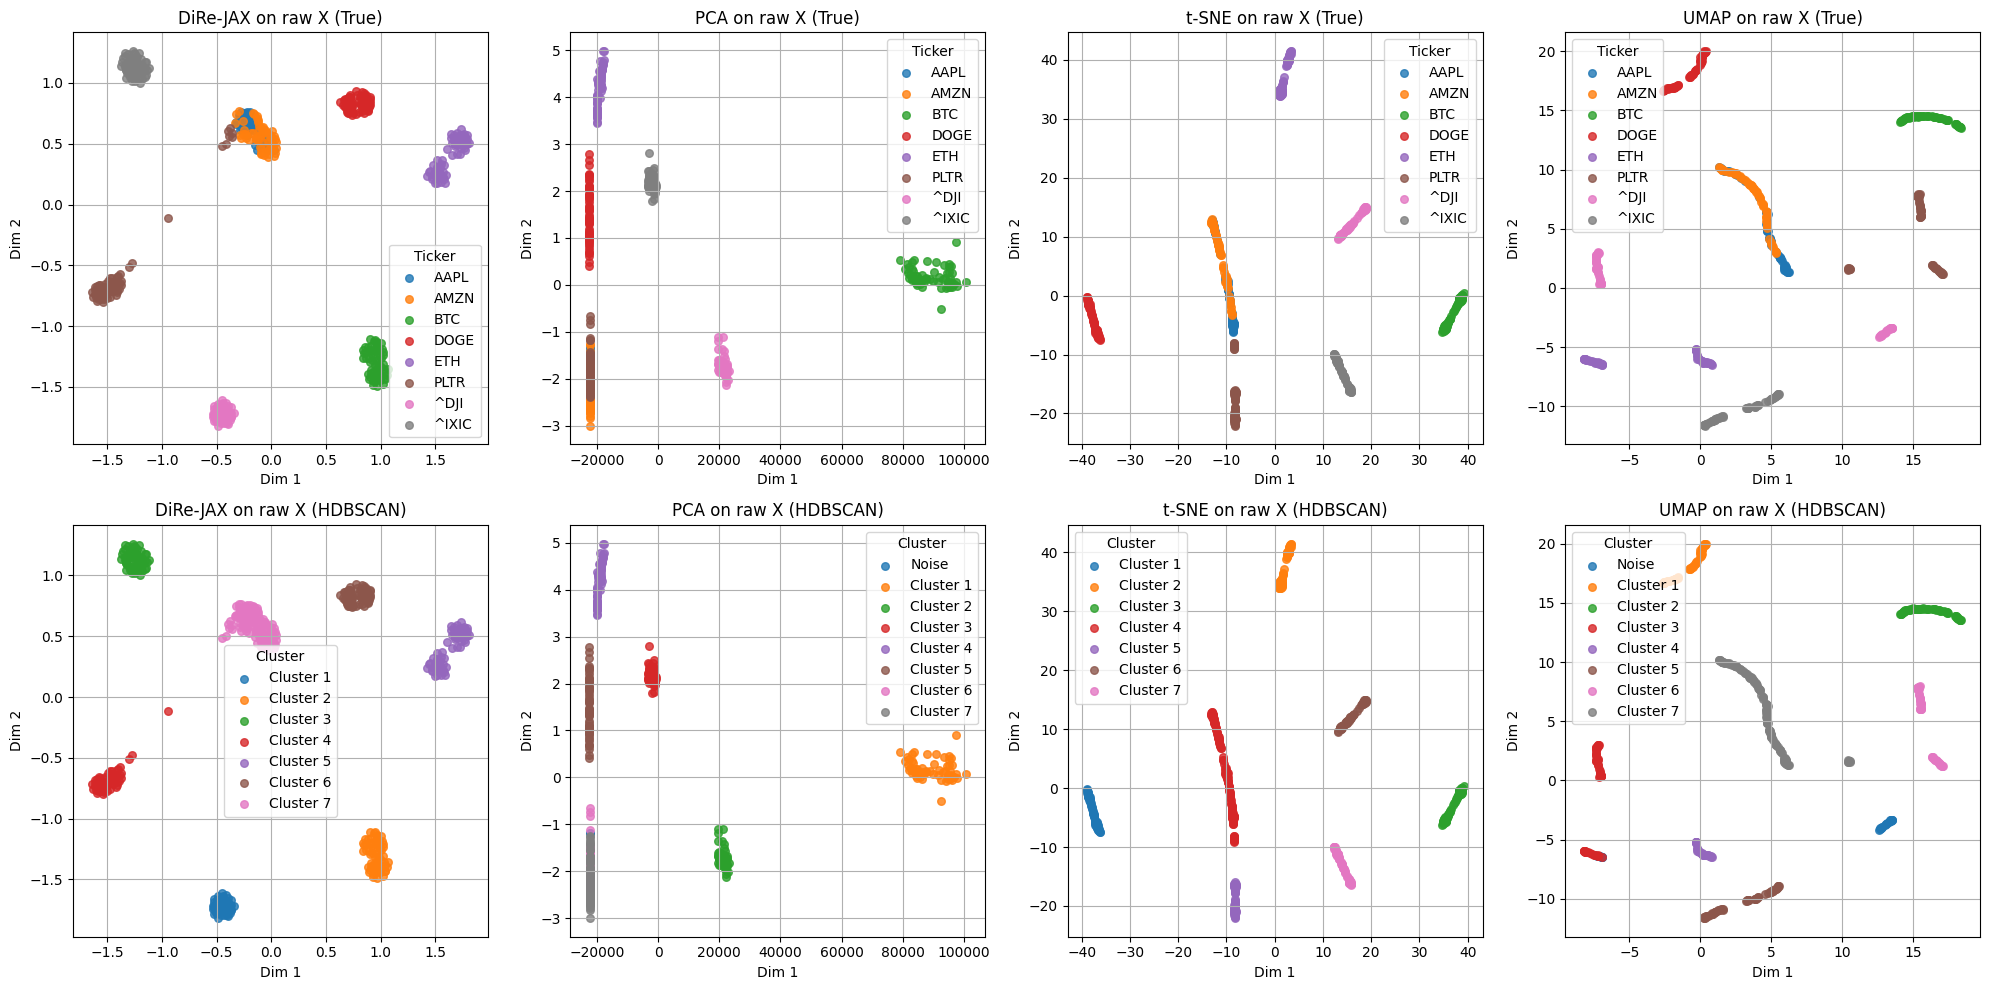

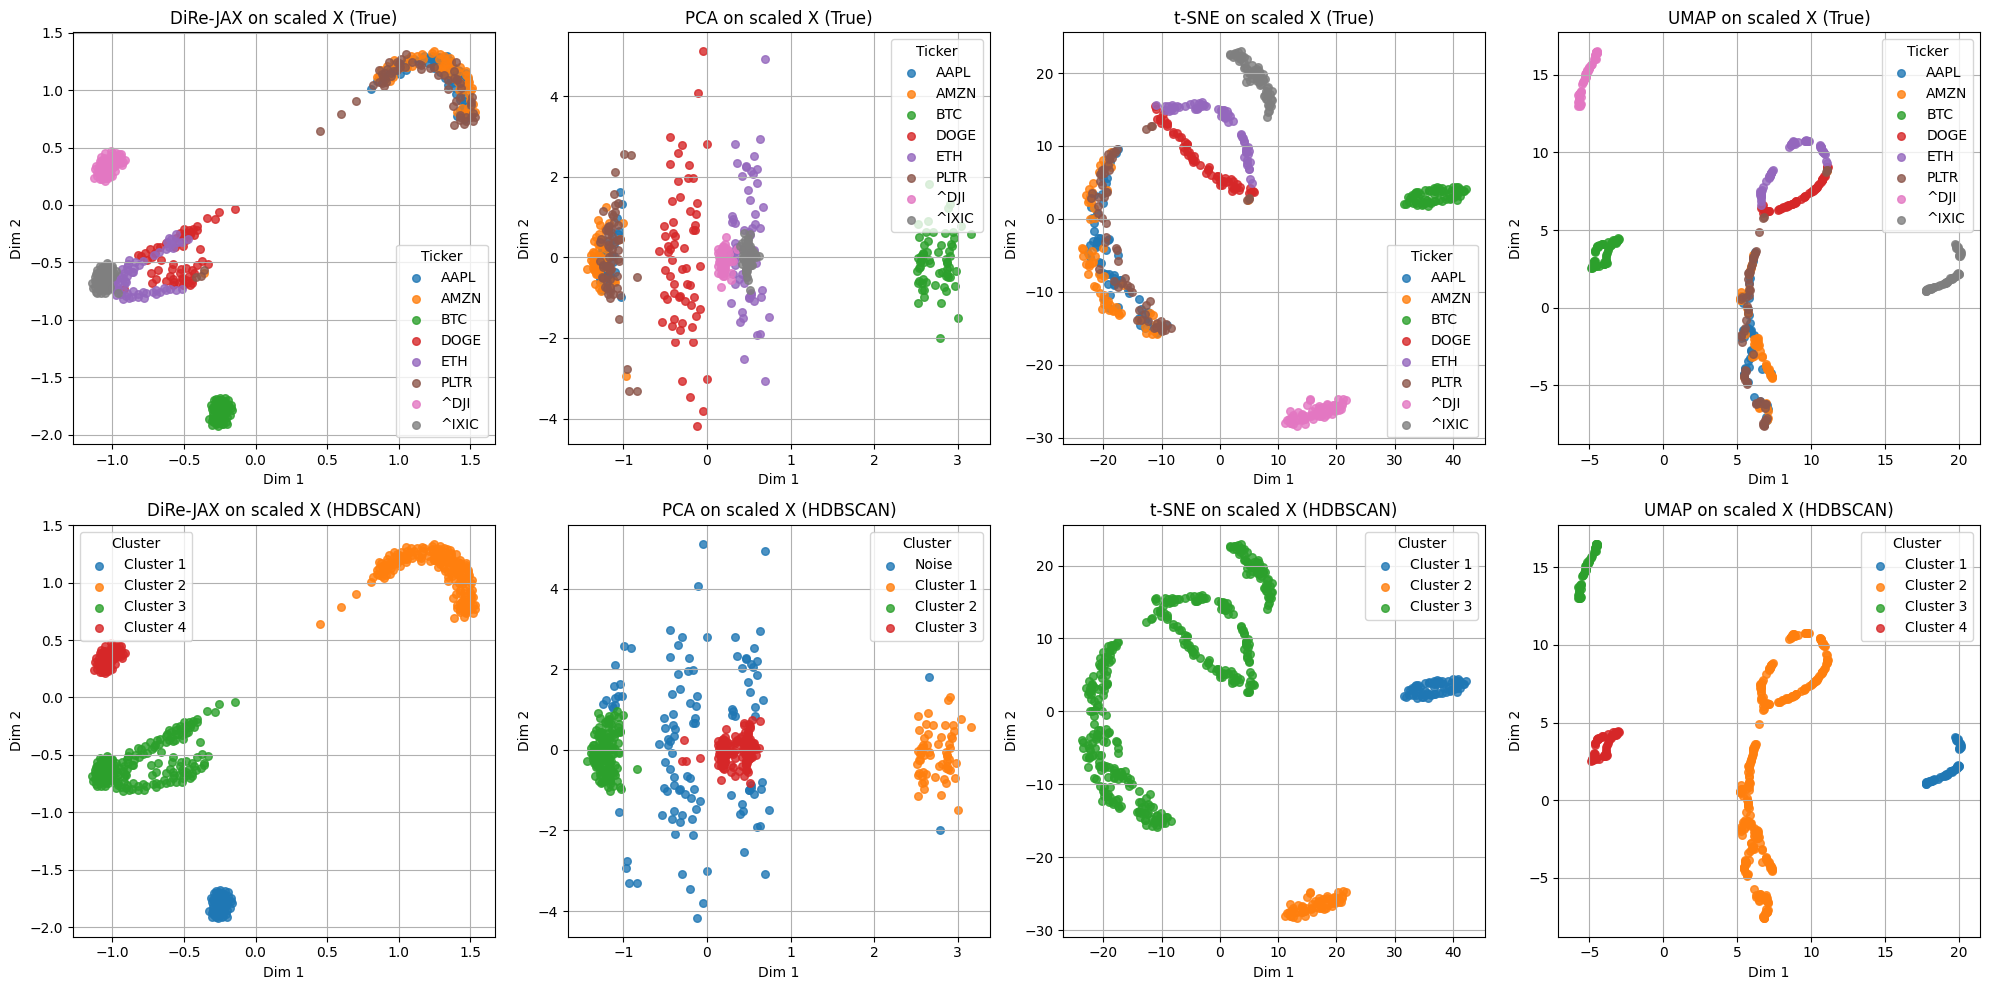

In [9]:
# ── 4) Visualize HDBSCAN vs True labels for 2D embeddings ───────────────────────
methods = ["DiRe-JAX","PCA","t-SNE","UMAP"]
for dataset in ["raw", "scaled"]:
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    for j, name in enumerate(methods):
        Z = embeddings[(dataset, 2, name)]
        # True labels
        ax = axes[0, j]
        for i, lbl in enumerate(label_list):
            idxs = [k for k, L in enumerate(labels) if L == lbl]
            ax.scatter(Z[idxs, 0], Z[idxs, 1],
                       label=lbl, s=30, alpha=0.8,
                       color=palette(i))
        ax.set_title(f"{name} on {dataset} X (True)")
        ax.set_xlabel("Dim 1"); ax.set_ylabel("Dim 2")
        ax.legend(title="Ticker"); ax.grid(True)

        # HDBSCAN clusters
        clusterer = hdbscan.HDBSCAN(min_cluster_size=30)
        clusters  = clusterer.fit_predict(Z)
        ax = axes[1, j]
        unique_clusters = sorted(set(clusters))
        for i, cl in enumerate(unique_clusters):
            idxs = [k for k, c in enumerate(clusters) if c == cl]
            label = f"Cluster {cl+1}" if cl >= 0 else "Noise"
            ax.scatter(Z[idxs, 0], Z[idxs, 1],
                       label=label, s=30, alpha=0.8,
                       color=palette(i % 10))
        ax.set_title(f"{name} on {dataset} X (HDBSCAN)")
        ax.set_xlabel("Dim 1"); ax.set_ylabel("Dim 2")
        ax.legend(title="Cluster"); ax.grid(True)

    plt.tight_layout()
    plt.show()

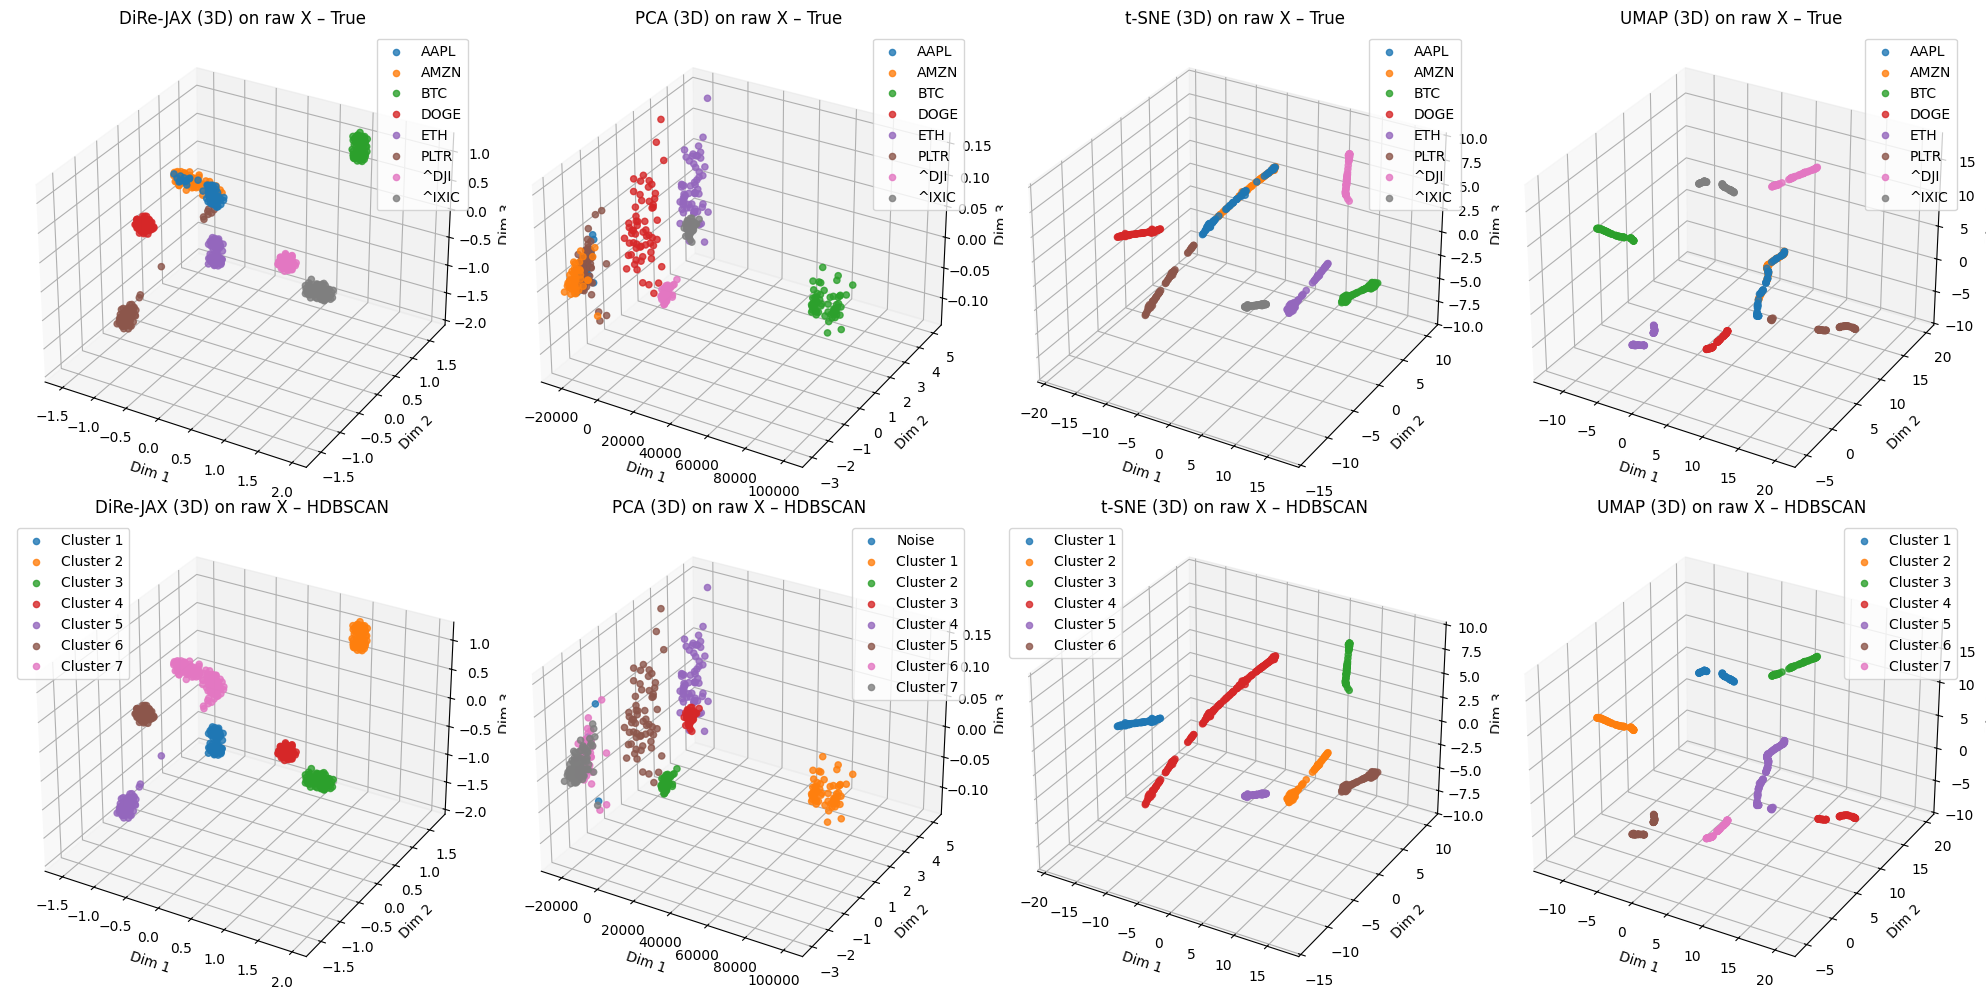

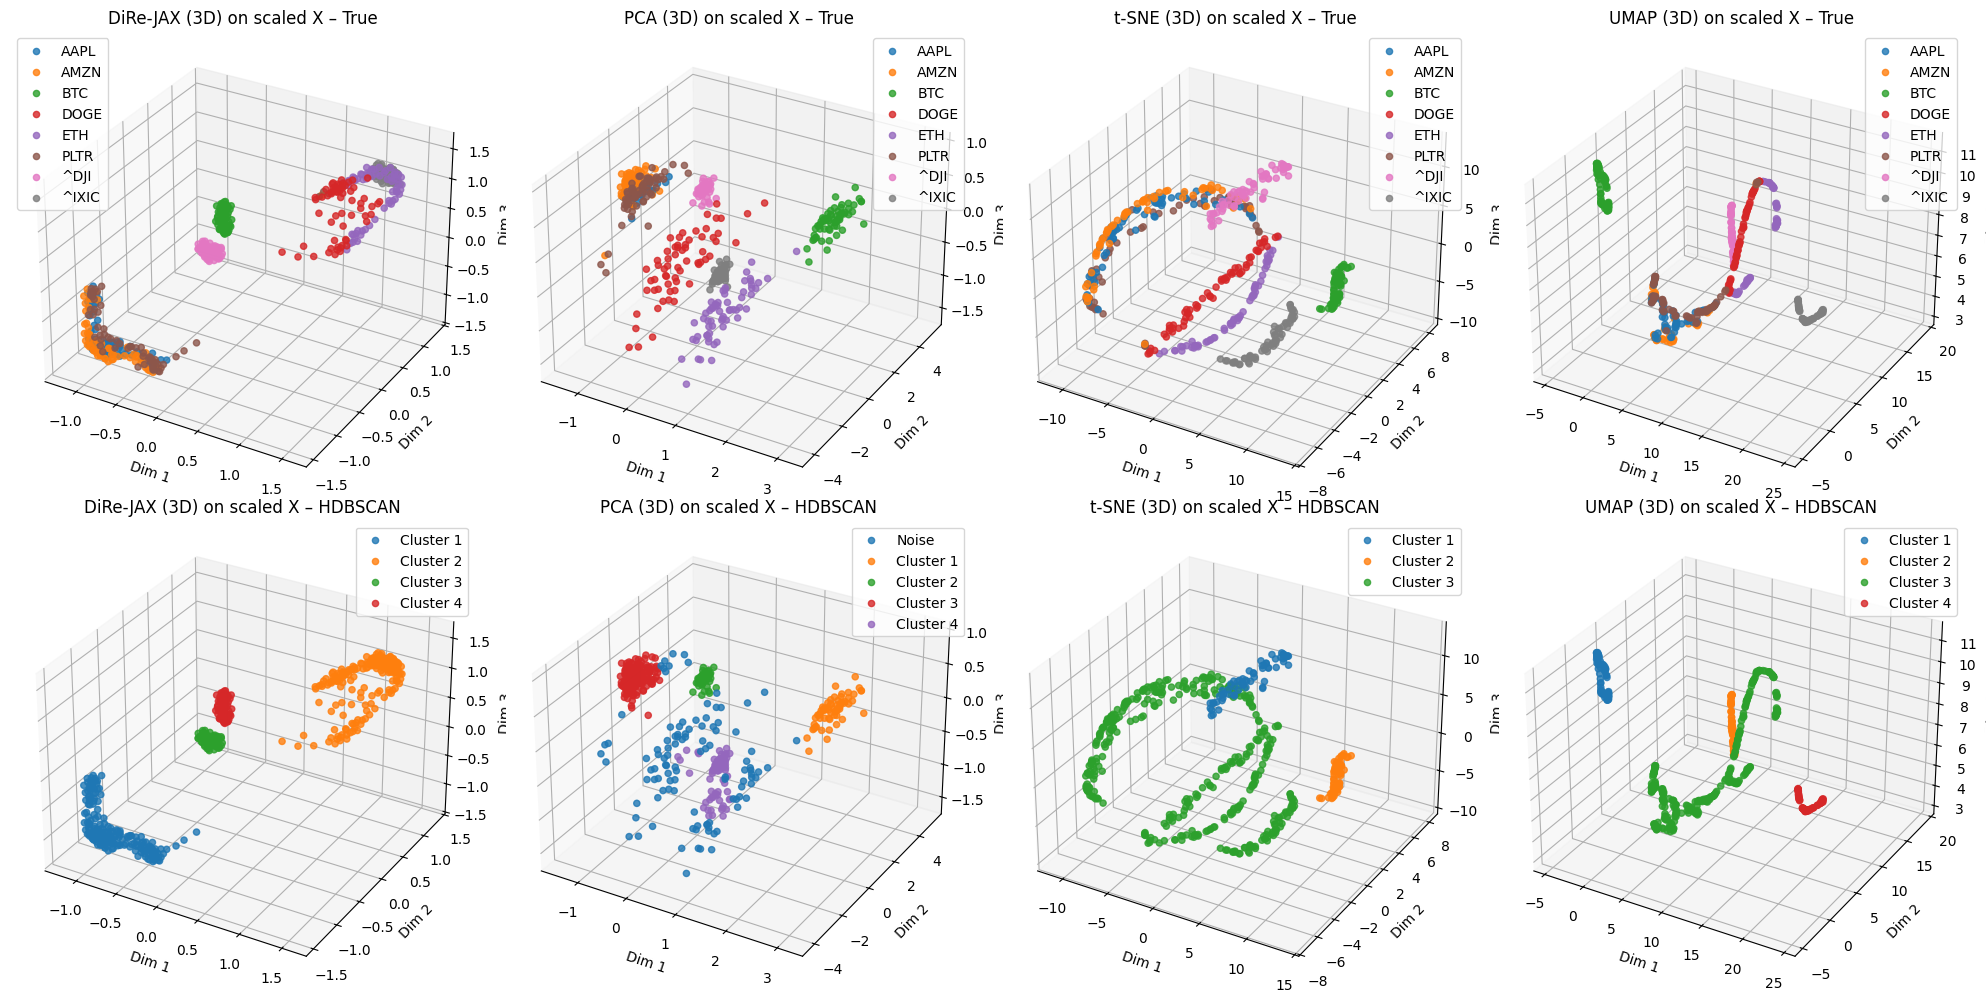

In [10]:
# ── 5) Plot 3D true vs clusters ────────────────────────────────────────────────
for dataset in ["raw", "scaled"]:
    fig, axes = plt.subplots(2, 4, figsize=(20, 10), subplot_kw={'projection':'3d'})
    for j, name in enumerate(methods):
        Z3 = embeddings[(dataset, 3, name)]
        # True labels
        ax = axes[0, j]
        for i, lbl in enumerate(label_list):
            idxs = [k for k, L in enumerate(labels) if L == lbl]
            ax.scatter(Z3[idxs,0], Z3[idxs,1], Z3[idxs,2],
                       label=lbl, s=20, alpha=0.8,
                       color=palette(i))
        ax.set_title(f"{name} (3D) on {dataset} X – True")
        ax.set_xlabel("Dim 1"); ax.set_ylabel("Dim 2"); ax.set_zlabel("Dim 3"); ax.legend(); ax.grid(True)

        # HDBSCAN clusters
        clusters = hdbscan.HDBSCAN(min_cluster_size=30).fit_predict(Z3)
        ax = axes[1, j]
        for i, cl in enumerate(sorted(set(clusters))):
            idxs = [k for k, c in enumerate(clusters) if c == cl]
            label = f"Cluster {cl+1}" if cl >= 0 else "Noise"
            ax.scatter(Z3[idxs,0], Z3[idxs,1], Z3[idxs,2],
                       label=label, s=20, alpha=0.8,
                       color=palette(i % 10))
        ax.set_title(f"{name} (3D) on {dataset} X – HDBSCAN")
        ax.set_xlabel("Dim 1"); ax.set_ylabel("Dim 2"); ax.set_zlabel("Dim 3"); ax.legend(); ax.grid(True)

    plt.tight_layout()
    plt.show()